# Computer Vision
## Exercise Sheet 1: Imaging
### Erhardt Barth / Christoph Linse / Manuel Laufer / Kathleen Anderson
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{erhardt.barth, c.linse, m.laufer, k.anderson} @uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Omar Awad
2. Omar Zaki
3.
4.
5.


In [1]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 94 (delta 41), reused 68 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 1.26 MiB | 5.83 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations

from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline

## Exercise 1.1
### Loading and displaying images in Python
Download the image `clown.png` from the website of the tutorial. Load
the image in Python via opencv (`cv2.imread`). By default the image is loaded as BGR (blue, green, red), convert the image to gray with `cv2.cvtColor`.
Display the image `plt.imshow`, use the colormap `gray`.

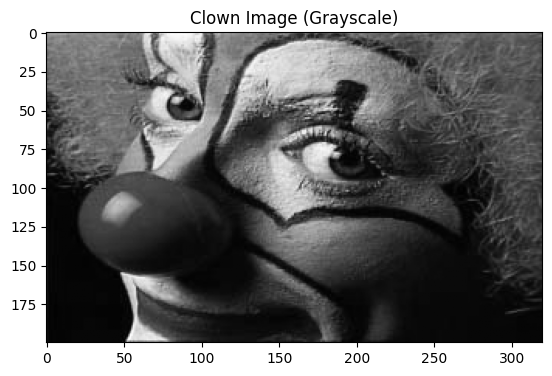

In [5]:

# TODO: define image path
image_path = '/content/cs4250/data/exercise_1/clown.png'

# TODO: read image
img_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if img_bgr is None:
    print(f"Error: Could not read image from {image_path}")
else:
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # TODO: display image
    plt.imshow(img_gray, cmap='gray')
    plt.title('Clown Image (Grayscale)') # Optional: adds a title to the plot
    plt.show()

## Exercise 1.2
### Image gradients
Images are stored as `numpy arrays`, for further computations convert the array to range $[0, 1]$ (`astype`). Define a function `load_gray_normalized` that loads the image, converts it to grayscale and normalizes it.
Compute the image gradients $d_x$ and $d_y$ for the image from the previous assignment. Initialize a simple gradient kernel like $[-1, 0, +1]$ for $d_x$ (`np.zeros`, `np.array`) and filter the image with it (`cv2.filter2D`). Visualize the results using `plt.imshow`. To this end, display the resulting images of both derivatives along `x` and `y` in a single figure (`plt.subplots`).

What do you need to take care of, to be able to visually **compare** the results?
Hint: the problem is related to the range of the pixel values in the two
gradient images. Name the problem and propose a solution to it by using the options of the `plt.imshow`
function.

In [6]:
def load_gray_normalized(image_path):
    """
    Loads an image, converts it to grayscale, and normalizes it to the range [0, 1].

    Args:
        image_path (str): The path to the image file.

    Returns:
        numpy.ndarray: The normalized grayscale image, or None if loading fails.
    """
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"Error: Could not read image from {image_path}")
        return None
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    # Convert to float and normalize to [0, 1]
    # Images are typically loaded as uint8 (0-255)
    img_normalized = img_gray.astype(np.float32) / 255.0
    return img_normalized

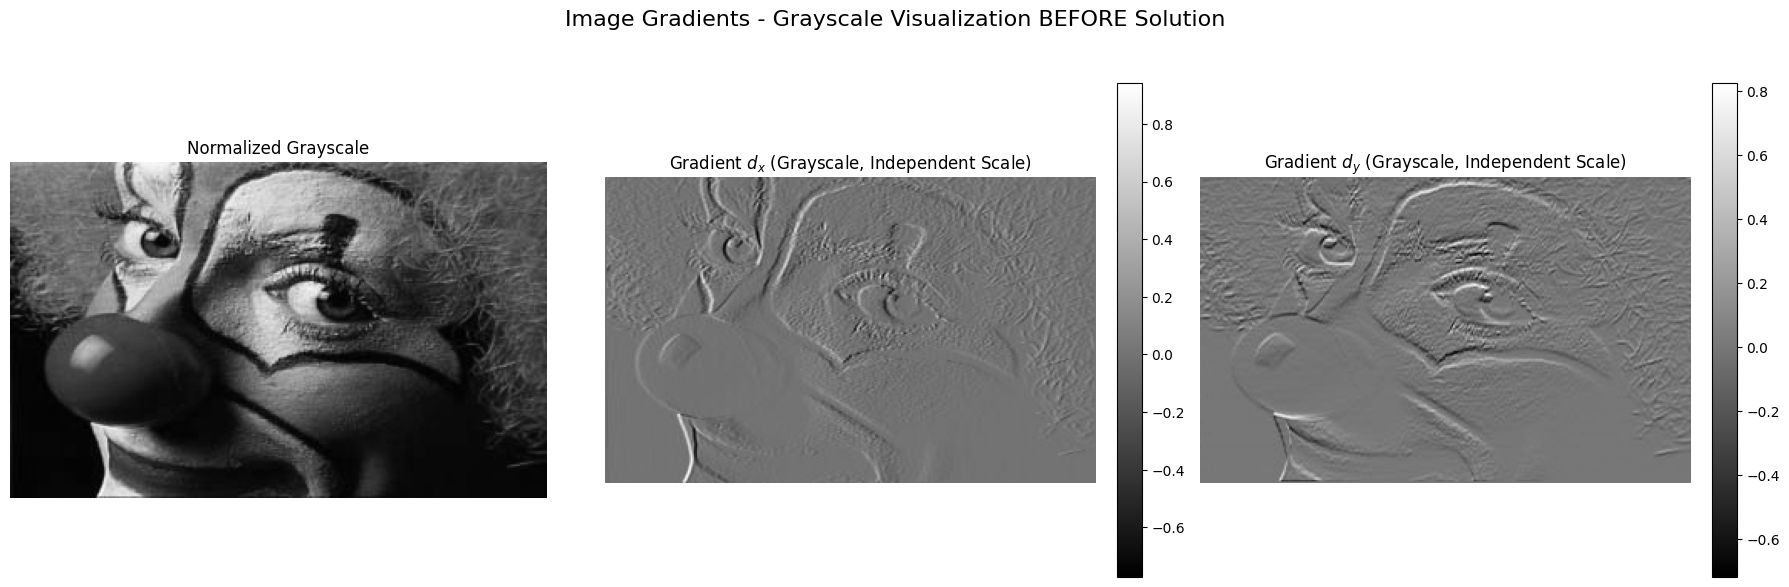

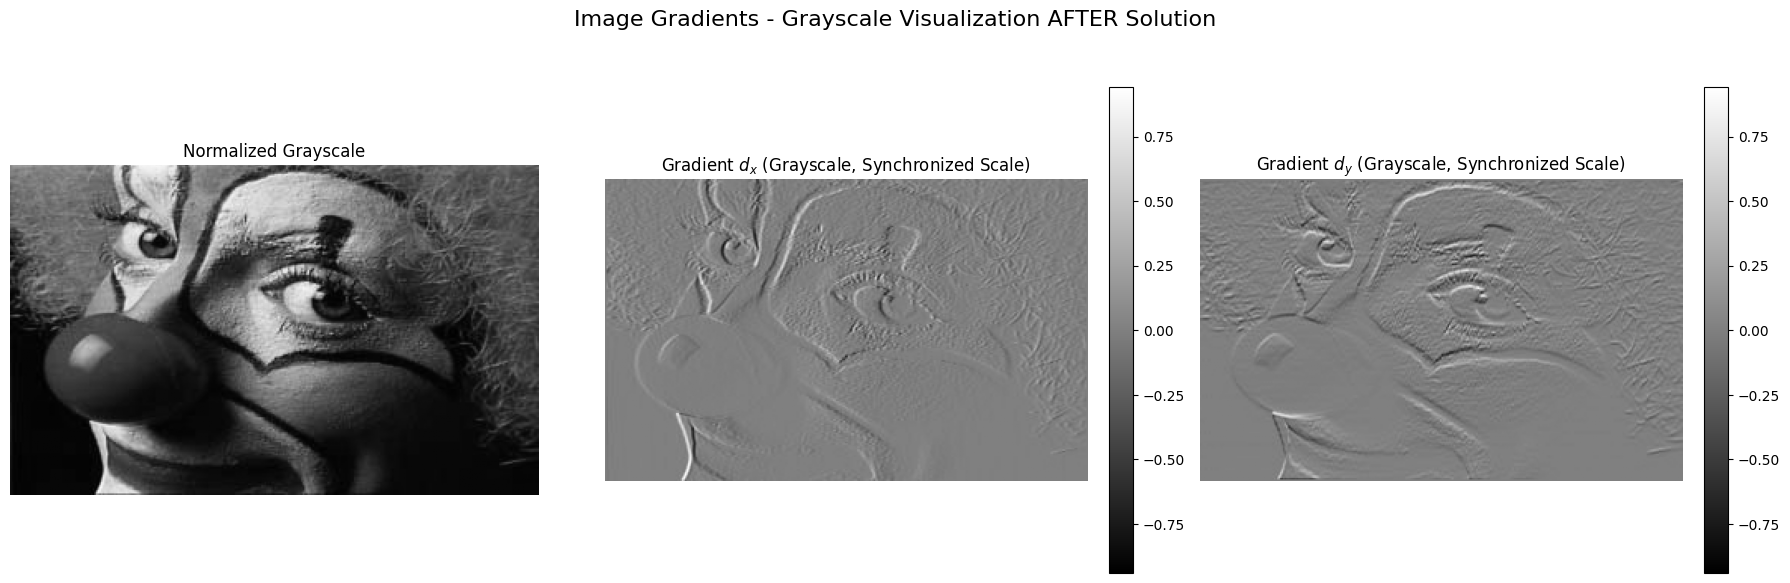

In [10]:

image_path_clown = '/content/cs4250/data/exercise_1/clown.png'
img_norm_gray = load_gray_normalized(image_path_clown)


if img_norm_gray is not None:
    # 2. Define gradient kernels
    kernel_dx = np.array([[-1, 0, 1]], dtype=np.float32)
    kernel_dy = np.array([[-1], [0], [1]], dtype=np.float32)

    # 3. Filter the image to get gradients
    dx = cv2.filter2D(img_norm_gray, -1, kernel_dx)
    dy = cv2.filter2D(img_norm_gray, -1, kernel_dy)

    # --- Visualization BEFORE the proposed solution (Grayscale, Independent Scaling) ---
    fig_before, axes_before = plt.subplots(1, 3, figsize=(18, 6))

    # Original Normalized Grayscale Image
    axes_before[0].imshow(img_norm_gray, cmap='gray', vmin=0, vmax=1) # Explicitly set vmin/vmax for original
    axes_before[0].set_title('Normalized Grayscale')
    axes_before[0].axis('off')

    # Gradient d_x (grayscale, default imshow scaling)
    img_show_dx_before = axes_before[1].imshow(dx, cmap='gray')
    axes_before[1].set_title('Gradient $d_x$ (Grayscale, Independent Scale)')
    axes_before[1].axis('off')
    fig_before.colorbar(img_show_dx_before, ax=axes_before[1], orientation='vertical', fraction=0.046, pad=0.04)

    # Gradient d_y (grayscale, default imshow scaling)
    img_show_dy_before = axes_before[2].imshow(dy, cmap='gray')
    axes_before[2].set_title('Gradient $d_y$ (Grayscale, Independent Scale)')
    axes_before[2].axis('off')
    fig_before.colorbar(img_show_dy_before, ax=axes_before[2], orientation='vertical', fraction=0.046, pad=0.04)

    fig_before.suptitle('Image Gradients - Grayscale Visualization BEFORE Solution', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # --- Visualization AFTER the proposed solution (Grayscale, Synchronized Scaling) ---
    fig_after, axes_after = plt.subplots(1, 3, figsize=(18, 6))

    # Original Normalized Grayscale Image
    axes_after[0].imshow(img_norm_gray, cmap='gray', vmin=0, vmax=1) # Explicitly set vmin/vmax for original
    axes_after[0].set_title('Normalized Grayscale')
    axes_after[0].axis('off')

    # Determine a common symmetric scale for dx and dy for grayscale visualization
    # This makes 0 map to mid-gray, negative to darker, positive to lighter.
    abs_max_dx = np.max(np.abs(dx))
    abs_max_dy = np.max(np.abs(dy))
    shared_abs_max = max(abs_max_dx, abs_max_dy)
    if shared_abs_max == 0: # Avoid issues if gradients are all zero for vmin/vmax
        shared_abs_max = 1.0 # Default non-zero range if actual range is zero


    # Gradient d_x (grayscale, synchronized scale)
    img_show_dx_after = axes_after[1].imshow(dx, cmap='gray', vmin=-shared_abs_max, vmax=shared_abs_max)
    axes_after[1].set_title('Gradient $d_x$ (Grayscale, Synchronized Scale)')
    axes_after[1].axis('off')
    fig_after.colorbar(img_show_dx_after, ax=axes_after[1], orientation='vertical', fraction=0.046, pad=0.04)

    # Gradient d_y (grayscale, synchronized scale)
    img_show_dy_after = axes_after[2].imshow(dy, cmap='gray', vmin=-shared_abs_max, vmax=shared_abs_max)
    axes_after[2].set_title('Gradient $d_y$ (Grayscale, Synchronized Scale)')
    axes_after[2].axis('off')
    fig_after.colorbar(img_show_dy_after, ax=axes_after[2], orientation='vertical', fraction=0.046, pad=0.04)

    fig_after.suptitle('Image Gradients - Grayscale Visualization AFTER Solution', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


## Exercise 1.3
### Point operations
Download from the website the images `ueb131.png` and `ueb132.png`,
then load and display them.  
Both images illustrate two commonly encountered problems in photography.
Underexposed (overexposed) images are darker (brighter) than they should be,
because they have been exposed to too little (too much) light.

Compute and display the histograms (`plt.hist`,`np.flatten`) of the images in range $[0,1]$. Write a function `display_with_hist` that creates two subplots, showing the image and the respective histogram.

Can you identify the exposure problems in the histograms?
Hint: look at how the pixel intensities are distributed.

These defects can be corrected by remapping the pixel values to achieve a
more evenly distributed range of pixel intensities.
This can either be done by using histogram equalization (`cv2.equalizeHist`) or by using the logarithmic and power functions.

To use `cv2.equalizeHist`, the images need to be casted to uint8 in $[0,255]$. Write a function `normalized_to_uint8` to do this.

Apply the logarithmic and power to improve the two images. Experiment with different bases for the logarithm and power. To get a better feeling for the problem, plot the functions $x^2$ in $[0,1]$ and $log(x)$ in $[1,255]$ (why not $[0, 255]$?, `np.linspace, np.log, plt.plot`). **Where do the functions change quickly, where do they change slowly? How can you use this knowledge to improve the images?**

In [11]:
def display_with_hist(image_normalized, image_name="Image"):
    """
    Displays an image and its histogram.
    The input image is expected to be normalized (grayscale, range [0,1]).

    Args:
        image_normalized (numpy.ndarray): The normalized grayscale image to display.
        image_name (str): The title for the image and plots.
    """
    if image_normalized is None:
        print(f"Cannot display {image_name} as it is None.")
        return

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display image
    axes[0].imshow(image_normalized, cmap='gray', vmin=0, vmax=1)
    axes[0].set_title(f'{image_name}')
    axes[0].axis('off')

    # Display histogram
    # np.flatten() converts the 2D image array to a 1D array for the histogram
    # bins=256 for 256 intensity levels (common for 8-bit depth, even if normalized)
    # range=(0,1) as the image is normalized
    axes[1].hist(image_normalized.flatten(), bins=256, range=(0, 1), color='gray', alpha=0.75)
    axes[1].set_title(f'Histogram of {image_name}')
    axes[1].set_xlabel('Pixel Intensity (Normalized)')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].set_xlim(0, 1) # Ensure x-axis is strictly [0,1]

    plt.suptitle(f'Image and Histogram: {image_name}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for suptitle
    plt.show()

In [12]:
def normalized_to_uint8(image_normalized):
    """
    Converts a normalized image (float, range [0,1]) to uint8 (range [0,255]).

    Args:
        image_normalized (numpy.ndarray): The input image in float format, range [0,1].

    Returns:
        numpy.ndarray: The image in uint8 format, range [0,255].
    """
    image_uint8 = (image_normalized * 255.0).astype(np.uint8)
    return image_uint8

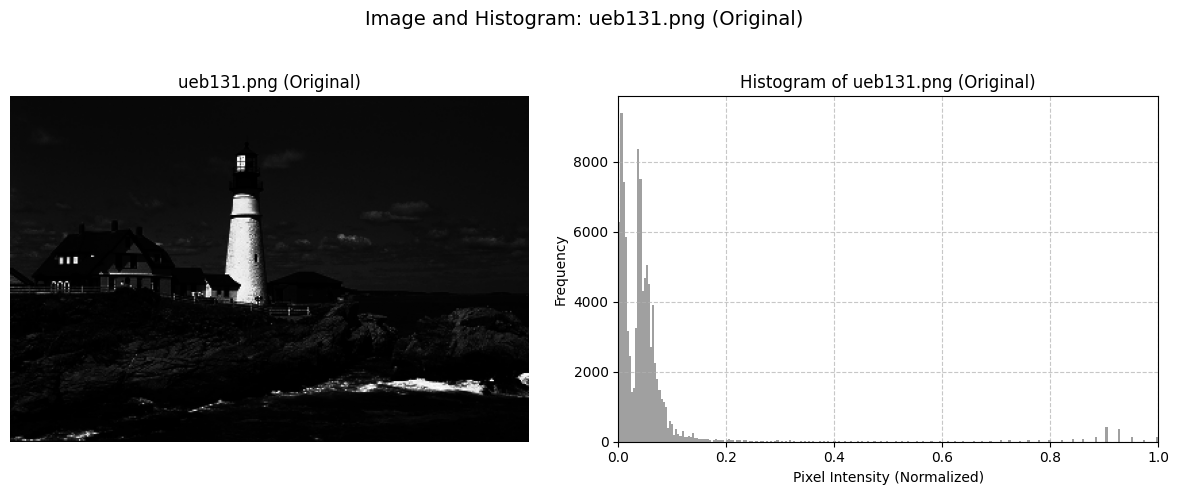

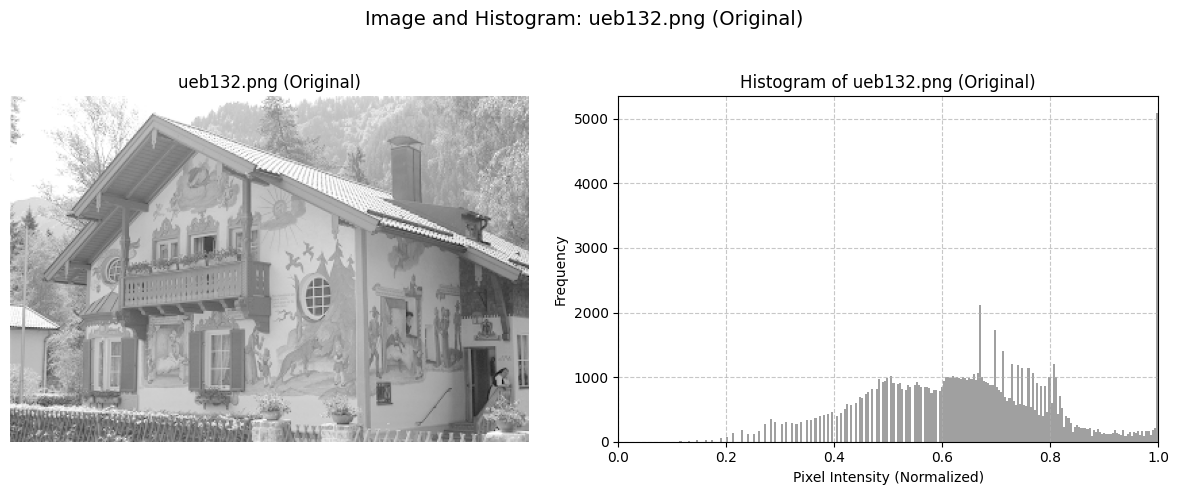

In [14]:
# TODO: load images

# TODO: display images with histograms

# Assuming the images are in the same data directory as clown.png
# (Update these paths if your files are located elsewhere)
path_ueb131 = '/content/cs4250/data/exercise_1/ueb131.png'
path_ueb132 = '/content/cs4250/data/exercise_1/ueb132.png'

# Load images
img_ueb131_norm = load_gray_normalized(path_ueb131)
img_ueb132_norm = load_gray_normalized(path_ueb132)

# Display images with their histograms
if img_ueb131_norm is not None:
    display_with_hist(img_ueb131_norm, "ueb131.png (Original)")
else:
    print(f"Failed to load {path_ueb131}")

if img_ueb132_norm is not None:
    display_with_hist(img_ueb132_norm, "ueb132.png (Original)")
else:
    print(f"Failed to load {path_ueb132}")



In [ ]:
# Assuming img_ueb131_norm and img_ueb132_norm are loaded and available
# from the previous step.
# And normalized_to_uint8 and display_with_hist are also defined.


    # TODO: convert images to uint8
    img_ueb131_uint8 = normalized_to_uint8(img_ueb131_norm)

    # TODO: equalize histogram and display
    img_ueb131_eq_uint8 = cv2.equalizeHist(img_ueb131_uint8)

    # Convert equalized uint8 image back to normalized float for display_with_hist
    img_ueb131_eq_norm = img_ueb131_eq_uint8.astype(np.float32) / 255.0

    display_with_hist(img_ueb131_eq_norm, "ueb131.png (Histogram Equalized)")


    # TODO: convert images to uint8
    img_ueb132_uint8 = normalized_to_uint8(img_ueb132_norm)

    # TODO: equalize histogram and display
    img_ueb132_eq_uint8 = cv2.equalizeHist(img_ueb132_uint8)

    # Convert equalized uint8 image back to normalized float for display_with_hist
    img_ueb132_eq_norm = img_ueb132_eq_uint8.astype(np.float32) / 255.0

    display_with_hist(img_ueb132_eq_norm, "ueb132.png (Histogram Equalized)")

In [ ]:
# TODO: display logarithmic function

# TODO: display quadratic function


In [ ]:
# TODO: transform and display ueb131.png


In [ ]:
# TODO: transform and display ueb132.png
